In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
images_folder = './images'

In [3]:
def load_image(file):
    image = cv2.imread(file)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return img

In [4]:
def drawHist(x):
    hist = cv2.calcHist([x], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.legend(('histogram'), loc='upper left')
    plt.show()

In [5]:
def globalThresholding(img, thres=127):
    img_rst = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img_rst[i][j] < thres:
                img_rst[i][j] = 255
            else:
                img_rst[i][j] = 0
    return img_rst

In [6]:
def adaptiveThresholding(f, nrow, ncol):
    g = f.copy()
    r = int(f.shape[0] / nrow)
    c = int(f.shape[1] / ncol)
    
    for i in range(int(nrow)):
        for j in range(int(ncol)):
            x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
            
            #cv2.imshow(x)  
            drawHist(x) 
            
            #t = np.average(x)
            t = int(input("Enter threshold: "))  
            
            g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
    
    return g

In [7]:
global_thresh = ['particles.bmp', 'Phandoan01.jpg', 'wdg2.jpg', 'Rice.png']
adaptive_thresh = ['wdg3.jpg']

IMAGE: particles.bmp


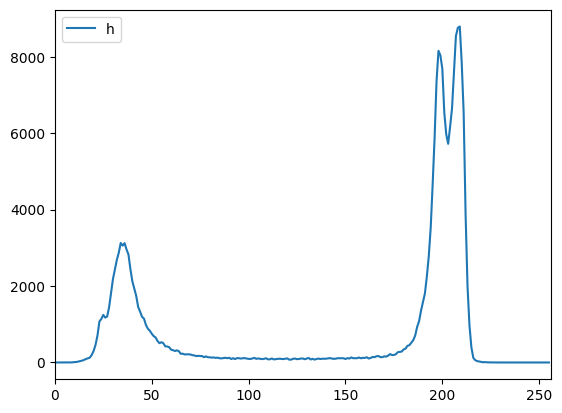

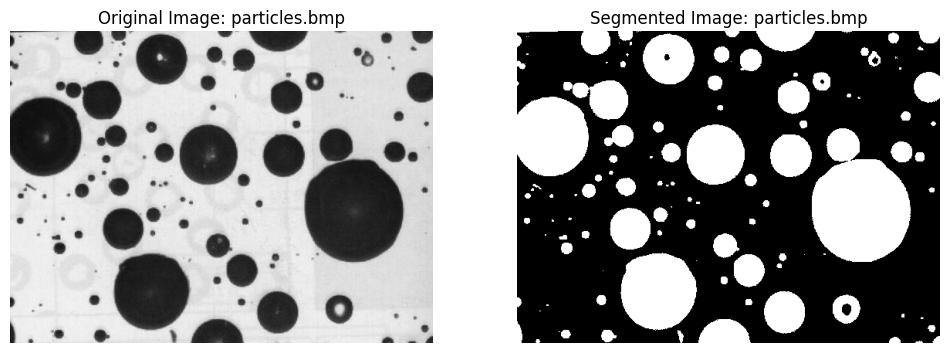

IMAGE: Phandoan01.jpg


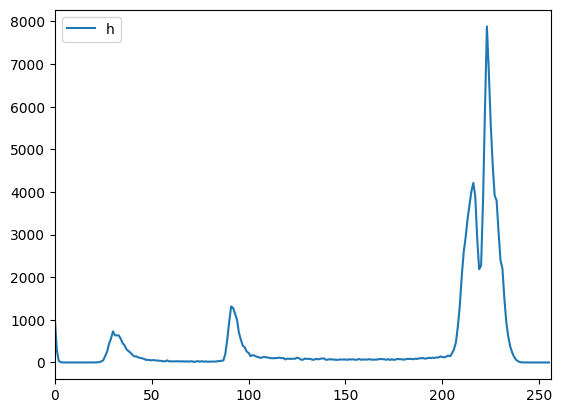

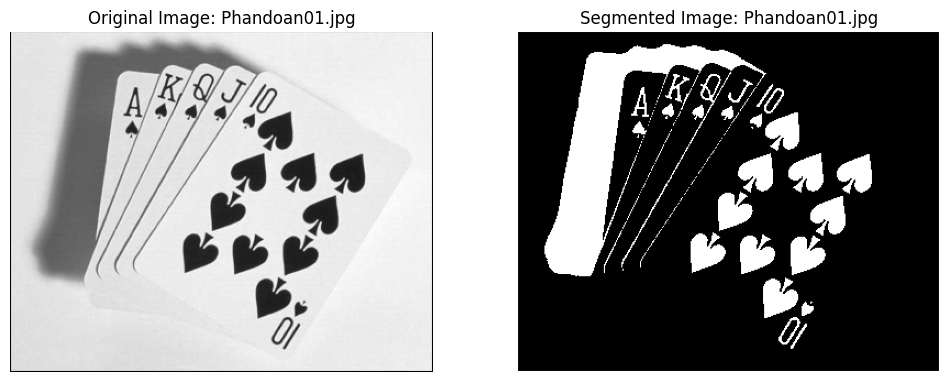

IMAGE: wdg2.jpg


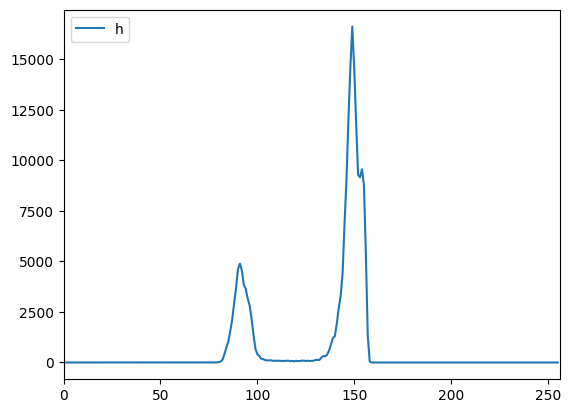

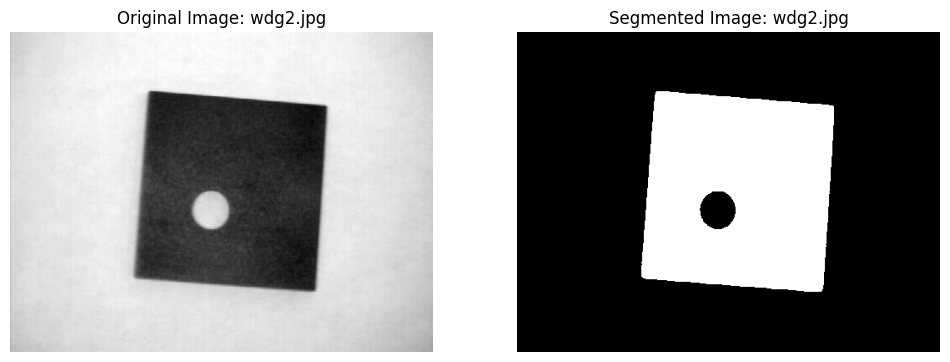

IMAGE: Rice.png


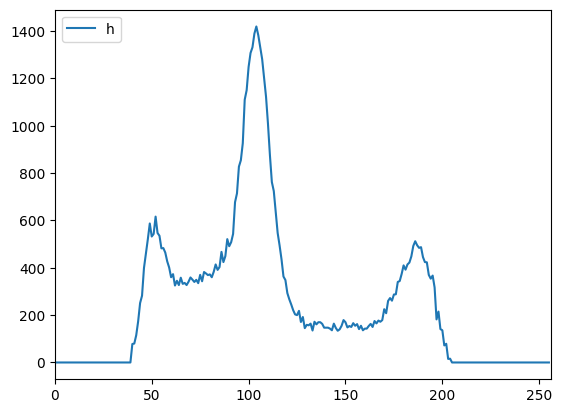

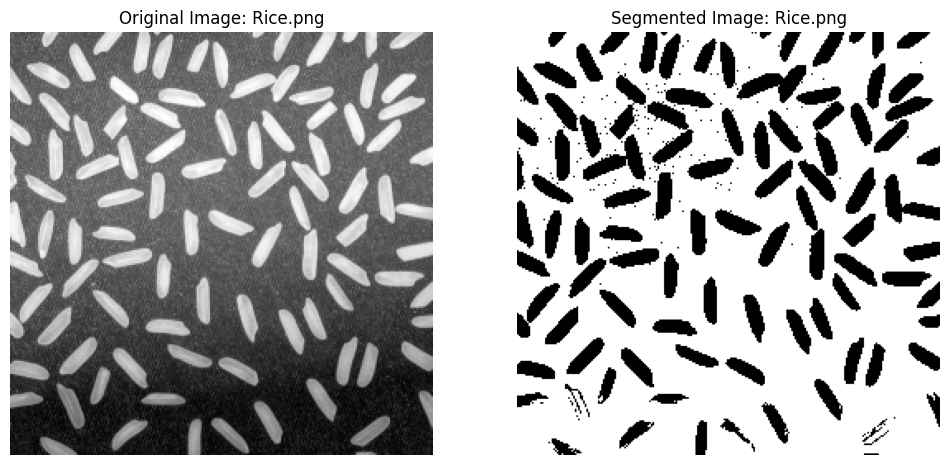

In [8]:
for file in global_thresh:
    filepath = os.path.join(images_folder, file)
    img = load_image(filepath)
    print (f'IMAGE: {file}')
    drawHist(img)
    img_rst = globalThresholding(img)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"Original Image: {file}")
    ax[0].axis('off')  
    
    ax[1].imshow(img_rst, cmap='gray')
    ax[1].set_title(f"Segmented Image: {file}")
    ax[1].axis('off') 
    
    plt.show()

IMAGE: wdg3.jpg


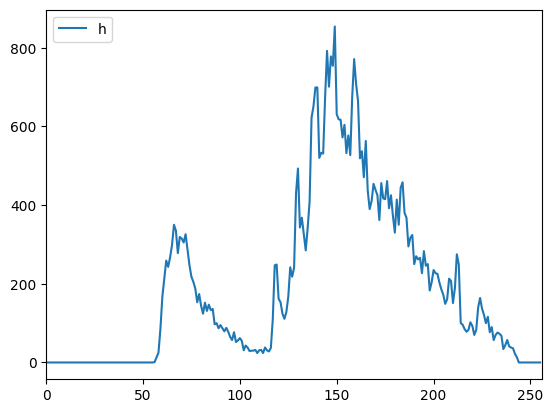

In [ ]:
for file in adaptive_thresh:
    filepath = os.path.join(images_folder, file)
    img = load_image(filepath)
    print (f'IMAGE: {file}')
    img_rst = adaptiveThresholding(img, 2, 2)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"Original Image: {file}")
    ax[0].axis('off')  
    
    ax[1].imshow(img_rst, cmap='gray')
    ax[1].set_title(f"Segmented Image: {file}")
    ax[1].axis('off') 
    
    plt.show()

In [ ]:
t = int(input("Enter threshold: "))  